<a href="https://colab.research.google.com/github/Aditya-Suryawanshi-2003/ADS-Lab/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [7]:
!kaggle datasets download sachinpatel21/az-handwritten-alphabets-in-csv-format

Dataset URL: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
License(s): CC0-1.0


In [8]:
!unzip -o az-handwritten-alphabets-in-csv-format.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam , RMSprop
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [10]:
df = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')

In [11]:
x = df.drop('0', axis = 1)
y = df['0']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)
print('Train Data Shape:', y_train.shape)
print('Test Data Shape:', y_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)
Train Data Shape: (297960,)
Test Data Shape: (74490,)


In [13]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

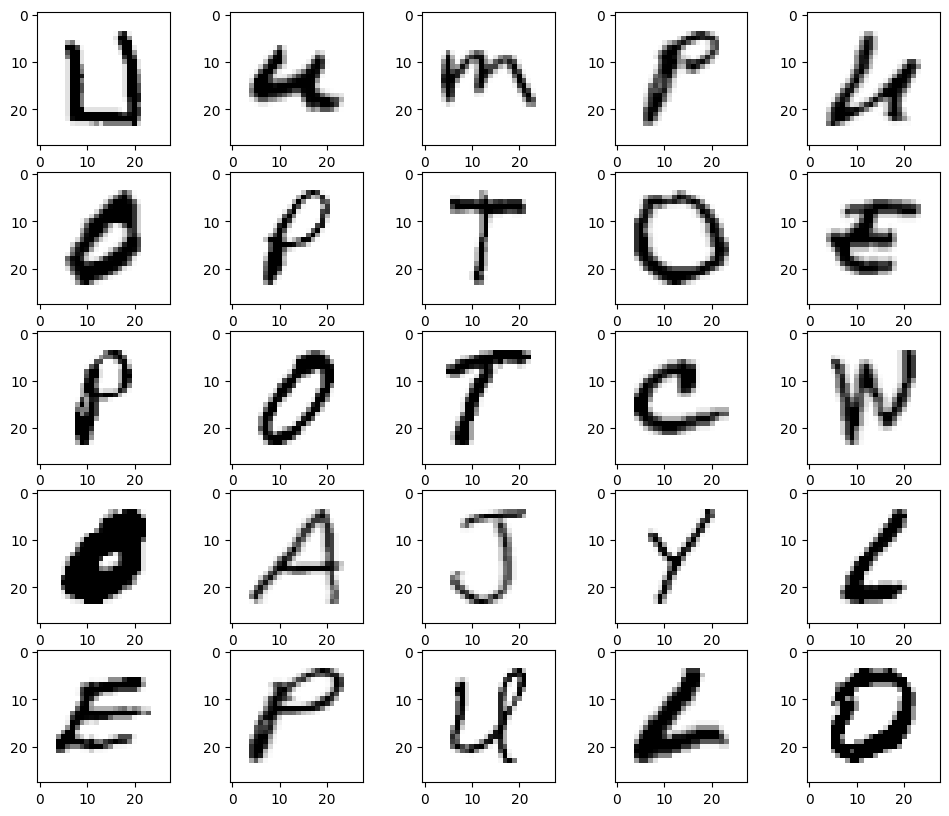

In [14]:
plt.figure(figsize = (12,10))
row, colums = 5, 5
for i in range(25):
    plt.subplot(colums, row, i+1)
    plt.imshow(x_train[i].reshape([28,28]),interpolation='nearest', cmap='Greys')
plt.show()

In [15]:
train_images = x_train / 255.0
test_images = x_test / 255.0

In [16]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
print("New shape of train data:", train_images.shape)

test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
print("New shape of test data:", test_images.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [17]:
import tensorflow as tf
number_of_classes = 26
ytrain = tf.keras.utils.to_categorical(y_train, number_of_classes)
ytest = tf.keras.utils.to_categorical(y_test, number_of_classes)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, ytrain, test_size=0.1, random_state=42)

In [19]:
def creat_model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPool2D(pool_size=(2, 2), strides=2))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=2))
  model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation="relu"))
  model.add(Dense(26, activation="softmax"))

  return model

In [28]:
optimizer = Adam
learning_rates = [0.99]
batch_sizes = [264]
results = {}

In [29]:
from sklearn.metrics import classification_report

In [31]:
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        model = creat_model()
        model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, validation_data=(X_val, y_val))
        Y_pred = model.predict(x_test)
        y_pred = np.round(Y_pred).astype(float)
        y_true = y_test





        results[(learning_rate, batch_size)] =  history

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1016/1016 ━━━━━━━━━━━━━━━━━━━━ 316s 308ms/step - accuracy: 0.1373 - loss: 1642213.6250 - val_accuracy: 0.1304 - val_loss: 2.9529
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step
